# Plot stationary solutions

Get the $\ell$'s which are the neutral modes and plot the growth rate for the corresponding solutions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

### Function Definitions

In [3]:
#get gammas from Lmid and kappa setting R=1 and tau=1
def get_gammas(Lmid, kappa):
    
    a = 0.25*(Lmid**2*kappa**2 - 0.5*(2*np.pi*Lmid+1)**2)**2 + 17*17/16 - (34/16)*(2*np.pi*Lmid+1)**2
    b = (17/4 - 0.25*(2*np.pi*Lmid+1)**2)**2
    c = 1/(17/4 - 0.25*(2*np.pi*Lmid + 1)**2 - 2)
    gamma0 = a*c/(a-b)
    gamma2 = -2*np.sqrt(b)*c/(a-b)
    gamma4 = c/(a-b)
    
    return [gamma0, gamma2, gamma4]

#define function that returns the neutral ell's for a given R/Lambda and kappa
def get_l(Lmid, kappa):
    
    gamma0, gamma2, gamma4 = get_gammas(Lmid, kappa)
    delta_p = (0.5/gamma4)*(-gamma2+np.sqrt(gamma2**2-4*gamma0*gamma4))
    delta_m = (0.5/gamma4)*(-gamma2-np.sqrt(gamma2**2-4*gamma0*gamma4))
    
    l_p = 0.5*(-1+np.sqrt(17+4*delta_p))
    l_m = 0.5*(-1+np.sqrt(17+4*delta_m))
        
    return l_p, l_m

#get the function g which is the tangent plane Laplacian of a normal mode
def get_g(kx, ky, theta0):
    #g = (1./np.tan(theta0))*1.j*ky - ky**2 - kx**2/(np.sin(theta0)**2)
    g = - ky**2 - kx**2/(np.sin(theta0)**2)
    return g

#get the value of the dispersion polynomial
def get_f(gammas, x):
    gamma0 = gammas[0]; gamma2 = gammas[1]; gamma4 = gammas[2]
    f = gamma0 - gamma2*x + gamma4*x**2
    return f
   

### Sweep through Lmids and kappas

In [5]:
Lmid_arr = np.linspace(0.1, 5, 500) 
kappa_arr = np.linspace(0.01, 2, 500)

l_p = np.empty([Lmid_arr.size, kappa_arr.size])
l_m = np.empty([Lmid_arr.size, kappa_arr.size])

i=0
j=0
        
for Lmid in Lmid_arr:
    j=0
    for kappa in kappa_arr:
        l_p[i][j], l_m[i][j] = get_l(Lmid, kappa)
        j=j+1
    i=i+1

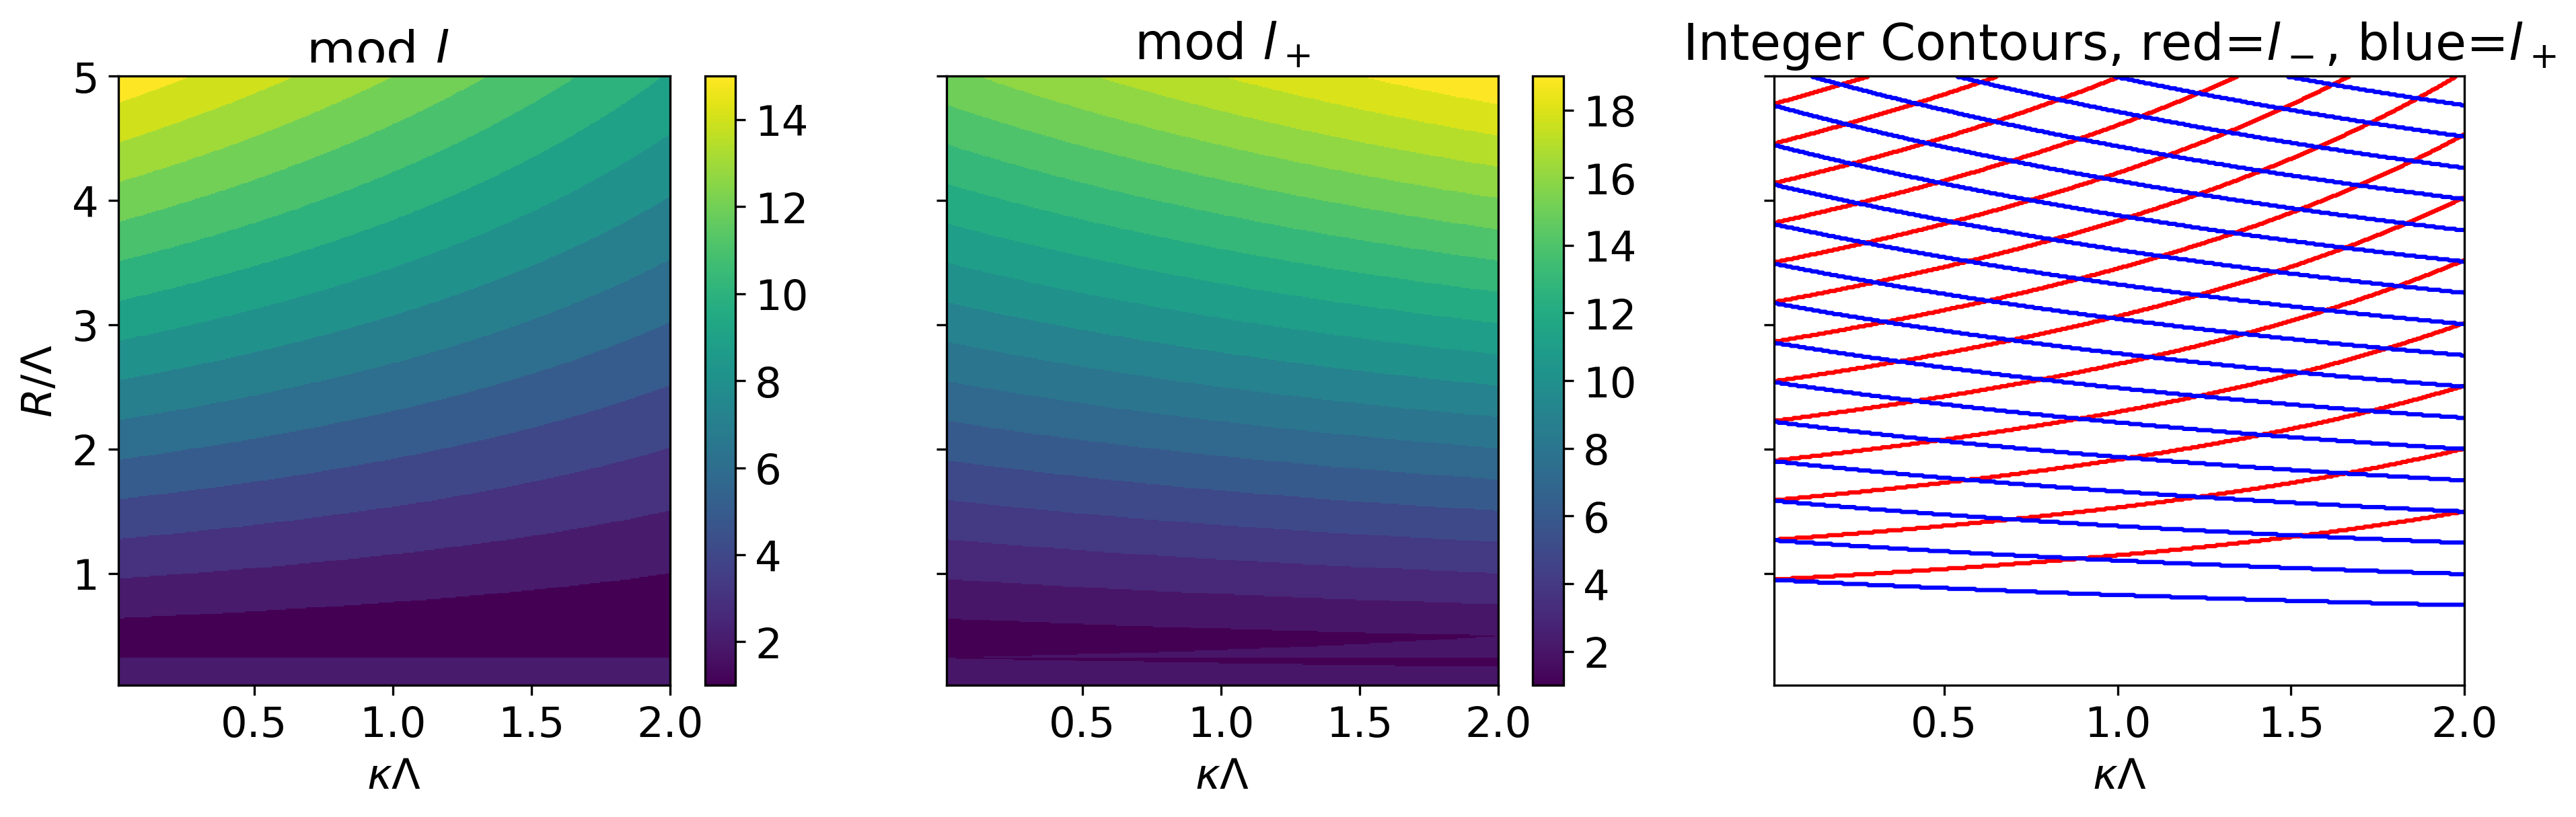

In [6]:
#plot the stationary modes
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
plt.rc('font', size=15)   

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True, dpi=300)

c1 = axs[0].pcolormesh(kappa_arr, Lmid_arr, np.floor(l_m))
axs[0].set_xlabel('$\kappa \Lambda$')
axs[0].set_ylabel('$R/\Lambda$')
axs[0].set_title('mod $l_-$')

c2 = axs[1].pcolormesh(kappa_arr, Lmid_arr, np.floor(l_p))
axs[1].set_xlabel('$\kappa \Lambda$')
#axs[1].set_ylabel('$R/\Lambda$')
axs[1].set_title('mod $l_+$')

fig.colorbar(c1, ax=axs[0])
fig.colorbar(c2, ax=axs[1])

axs[2].contour(kappa_arr, Lmid_arr, np.floor(l_m), np.arange(1,1000,1), colors='red')
axs[2].contour(kappa_arr, Lmid_arr, np.floor(l_p), np.arange(1,1000,1), colors='blue')
axs[2].set_title('Integer Contours, red=$l_-$, blue=$l_+$')
axs[2].set_xlabel('$\kappa \Lambda$')

plt.show()             

# Plot Spherical Harmonics

/Users/Rohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/Rohit/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


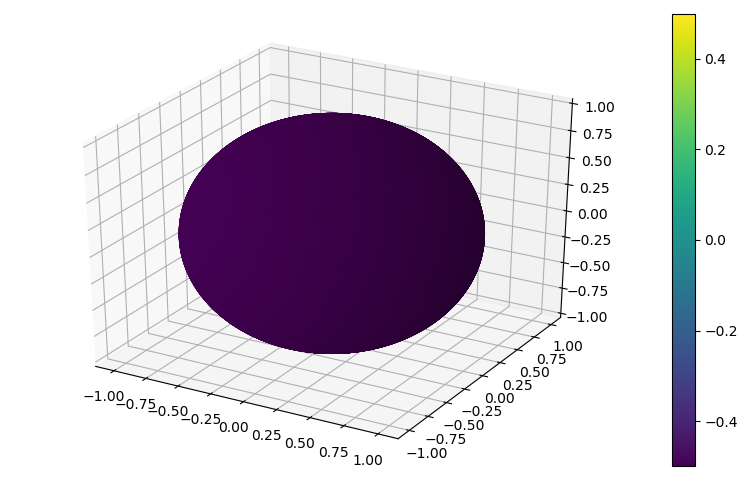

In [4]:
from scipy.special import sph_harm
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

phi = np.linspace(0, np.pi, 200) #note that theta, phi is flipped for sph_harm
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 0, 0

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Plot on a sphere 
fig = plt.figure(figsize=[10, 6], dpi=100)
ax = fig.add_subplot(111, projection='3d')
c = ax.plot_surface(x, y, z,  rstride=1, cstride=1,facecolors=cm.viridis(fcolors))
norm = colors.Normalize(vmin=-0.5, vmax=0.5)
m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
m.set_array(fcolors)
plt.colorbar(m)

#fig.colorbar(c)
#Turn off the axis planes
#ax.set_axis_off()
plt.show()

## Plot spherical harmonic along a longitude
Base solutions are:

$\psi_b(\theta) = \psi_0 Y_\ell^0 (\theta)$ and $\omega_b(\theta) = \psi_0 \ell (\ell + 1) Y_\ell^0(\theta)$

$\ell$ corresponds to the number of zero-crossings from $\theta = 0$ to $\pi$. This implies that $Y_\ell^0 \neq 0$ when $\ell$ is even (need to tune $\kappa \Lambda$ and $R/\Lambda$ to get this).  

ell =  12


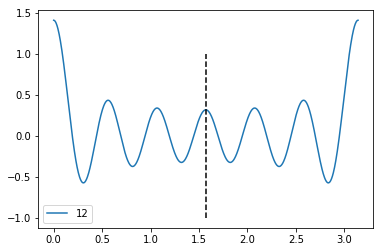

In [5]:
from scipy.special import sph_harm

l_array = [12]
phi = np.linspace(0,np.pi,1000)
plt.figure(figsize=(10,5), dpi=300)

%matplotlib inline
for ell in l_array:
    print('ell = ', ell)
    plt.plot(phi, sph_harm(0,ell,0,phi).real, label=str(ell))

plt.plot([np.pi/2, np.pi/2], [-1, 1], 'k--')
plt.legend()
#plt.show()

plt.savefig('ells.eps')


In [8]:
get_l(4,1)

(14.41239873268282, 10.412398732682817)

### Plot the growth rate

$\sigma_\pm = f(g(k_x, k_y, \theta_0) + 4) (g(k_x, k_y, \theta_0) + 2) - \left[\frac{f_0 }{g(k_x, k_y, \theta_0)} +   \left(1 +  \frac{\ell_\pm (\ell_\pm +1) }{g(k_x, k_y, \theta_0)}\right) \frac{\psi_0 Y'_{\ell_\pm 0} (\theta_0)}{\sin \theta_0} \right] i k_x$,

where,

$Y'_{\ell 0} (\theta) = \frac{\ell}{\sin \theta} \left[\cos \theta P_{\ell}^0 (\cos \theta) - P^{0}_{\ell -1} (\cos \theta)\right]$,

$g(k_x, k_y, \theta_0) = \cot \theta_0 (i k_y) - k_y^2 - k_x^2/\sin^2 \theta_0$

and 

$f_0 = 2 \Omega$ 

l_p =  14.0 l_m= 10.0
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0


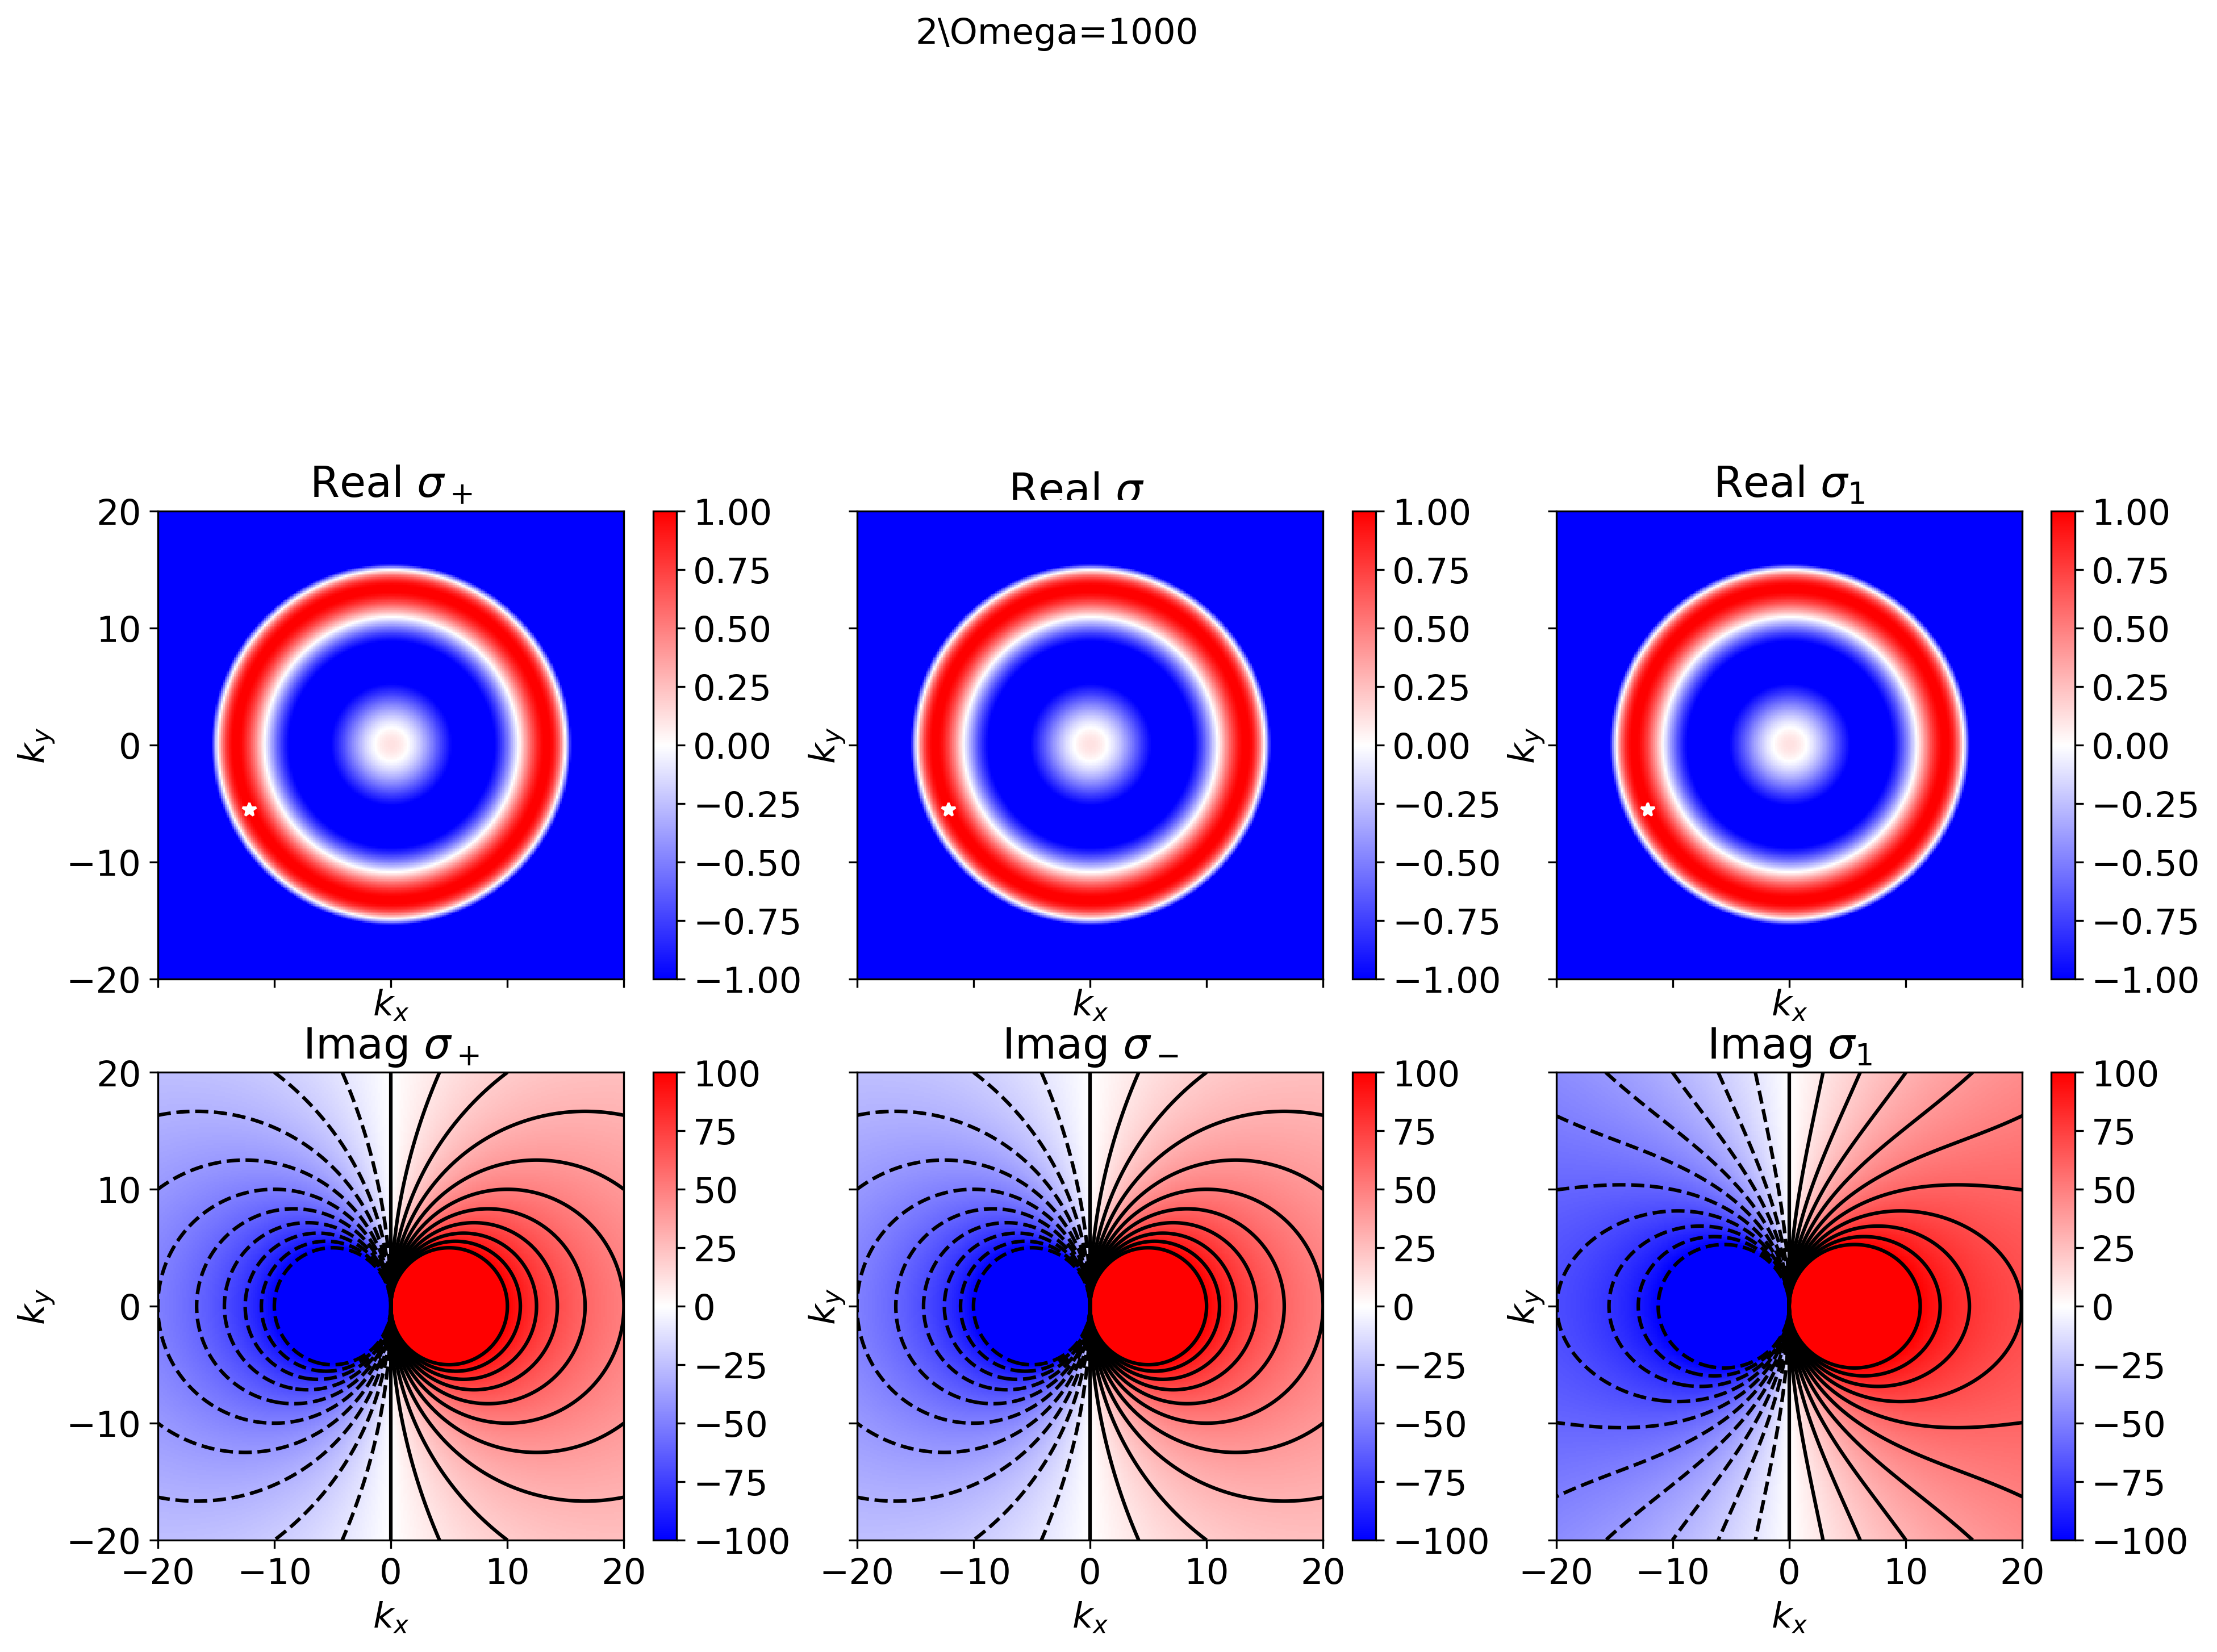

In [90]:
Lmid, kappa, f0 = 4, 1, 1000
theta0, psi0 = np.pi/2, 1
gammas = get_gammas(Lmid, kappa)
Nx, Ny = 250, 300

kx = np.linspace(-20, 20, Nx)
ky = np.linspace(-20, 20, Ny)
kkx, kky = np.meshgrid(kx, ky)

l_p, l_m = get_l(Lmid, kappa)
print('l_p = ', np.rint(l_p), 'l_m=', np.rint(l_m))
ells = np.rint(np.array([l_p, l_m, 1]))
sig = np.zeros([3, Ny, Nx], dtype=complex)

for ind in range(3):
    ell = ells[ind]
    Y_der = (ell/np.sin(theta0))*(np.cos(theta0)*sp.lpmn(0,ell,np.cos(theta0))[0][0][-1]  -\
                                  sp.lpmn(0,ell-1,np.cos(theta0))[0][0][-1])
    Y_der_mod = -np.sin(theta0)*sp.lpmn(0,ell,np.cos(theta0))[1][0][-1]
    print(Y_der, Y_der_mod)
    sig[ind][:][:] = get_f(gammas, get_g(kkx, kky, theta0) + 4)*(get_g(kkx, kky, theta0) + 2) -\
        f0*1.j*kkx/get_g(kkx, kky, theta0) - (1 + ell*(ell+1)/get_g(kkx, kky, theta0))*psi0*Y_der*1.j*kkx/np.sin(theta0)

#plotting 
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharey=True, sharex=True, dpi=300)

sig0 = np.real(sig[0][:][:])
sig1 = np.real(sig[1][:][:])
sig2 = np.real(sig[2][:][:])
sig3 = np.imag(sig[0][:][:])
sig4 = np.imag(sig[1][:][:])
sig5 = np.imag(sig[2][:][:])

cmin0, cmax0 = -1, 1
cmin, cmax = -100, 100
cmap = plt.cm.get_cmap("bwr")

###################################################
c0 = axs[0,0].pcolormesh(kkx, kky, sig0, vmin=cmin0, vmax=cmax0, cmap=cmap)
axs[0,0].set_xlabel('$k_x$')
axs[0,0].set_ylabel('$k_y$')
axs[0,0].set_title('Real $\sigma_+$')

fig.colorbar(c0, ax=axs[0,0])

#axs[0,0].contour(kkx, kky, sig0,colors='k')

ind = np.unravel_index(np.argmax(sig0, axis=None), sig0.shape)
axs[0,0].plot(kkx[ind], kky[ind], 'w*')

###################################################
c1 = axs[0,1].pcolormesh(kkx, kky, sig1, vmin=cmin0, vmax=cmax0, cmap=cmap)

axs[0,1].set_xlabel('$k_x$')
axs[0,1].set_ylabel('$k_y$')
axs[0,1].set_title('Real $\sigma_-$')
axs[0,1].text(-15, 60, r'2\Omega=%04d' %f0, fontsize='15')

fig.colorbar(c1, ax=axs[0,1])

ind = np.unravel_index(np.argmax(sig1, axis=None), sig1.shape)
axs[0,1].plot(kkx[ind], kky[ind], 'w*')

###################################################
c2 = axs[0,2].pcolormesh(kkx, kky, sig2, vmin=cmin0, vmax=cmax0, cmap=cmap)

axs[0,2].set_xlabel('$k_x$')
axs[0,2].set_ylabel('$k_y$')
axs[0,2].set_title('Real $\sigma_1$')

fig.colorbar(c2, ax=axs[0,2])

ind = np.unravel_index(np.argmax(sig2, axis=None), sig2.shape)
axs[0,2].plot(kkx[ind], kky[ind], 'w*')

###################################################
c3 = axs[1,0].pcolormesh(kkx, kky, sig3, vmin=cmin, vmax=cmax, cmap=cmap)

axs[1,0].set_xlabel('$k_x$')
axs[1,0].set_ylabel('$k_y$')
axs[1,0].set_title('Imag $\sigma_+$')

fig.colorbar(c3, ax=axs[1,0])

axs[1,0].contour(kkx, kky, sig3, np.linspace(-100, 100, 21), colors='k')

###################################################
c4 = axs[1,1].pcolormesh(kkx, kky, sig4, vmin=cmin, vmax=cmax, cmap=cmap)

axs[1,1].set_xlabel('$k_x$')
axs[1,1].set_ylabel('$k_y$')
axs[1,1].set_title('Imag $\sigma_-$')

fig.colorbar(c4, ax=axs[1,1])

axs[1,1].contour(kkx, kky, sig4, np.linspace(-100, 100, 21), colors='k')

###################################################
c5 = axs[1,2].pcolormesh(kkx, kky, sig5, vmin=cmin, vmax=cmax, cmap=cmap)

axs[1,2].set_xlabel('$k_x$')
axs[1,2].set_ylabel('$k_y$')
axs[1,2].set_title('Imag $\sigma_1$')

fig.colorbar(c5, ax=axs[1,2])

axs[1,2].contour(kkx, kky, sig5, np.linspace(-100, 100, 21), colors='k')

plt.show()


(300, 250) (250,) (300,)


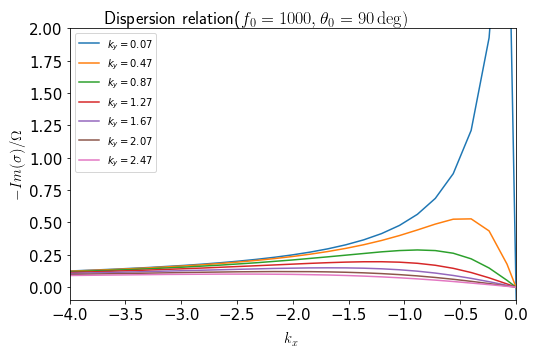

In [91]:
print(sig3.shape, kx.shape, ky.shape)

inds = range(150,170,3)

plt.figure(figsize=(8,5))
plt.plot(kx,-sig3[inds,:].T/f0/2)
plt.xlim([-4, 0]);
plt.ylim([-0.1,2])
plt.ylabel(r'$-Im(\sigma)/\Omega$', usetex=True); plt.xlabel(r'$k_x$', usetex=True)
plt.title(r'Dispersion relation($f_0=%d, \theta_0 = %d \deg)$' %(f0, theta0*180/np.pi), usetex=True)
plt.legend(['$k_y = %.2f$' %(kkk) for kkk in np.abs(ky[inds])], fontsize=10)

plt.savefig('disp_relation.pdf')

In [90]:
f0_arr = np.linspace(0,1000, 21)

Lmid, kappa = 4, 1
theta0, psi0 = np.pi/2, 1
gammas = get_gammas(Lmid, kappa)
Nx, Ny = 250, 300

kx = np.linspace(-50, 50, Nx)
ky = np.linspace(-50, 50, Ny)
kkx, kky = np.meshgrid(kx, ky)

l_p, l_m = get_l(Lmid, kappa)
print('l_p = ', np.rint(l_p), 'l_m=', np.rint(l_m))
ells = np.rint(np.array([l_p, l_m, 1])) #rounding the ells to nearest integer
sig = np.zeros([3, Ny, Nx], dtype=complex)

for f0 in f0_arr:
    
    print('f0=%04d' %f0)
    
    for ind in range(3):
        ell = ells[ind]
        Y_der = (ell/np.sin(theta0))*(np.cos(theta0)*sp.lpmn(0,ell,np.cos(theta0))[0][0][-1]  -\
                                      sp.lpmn(0,ell-1,np.cos(theta0))[0][0][-1])
        Y_der_mod = -np.sin(theta0)*sp.lpmn(0,ell,np.cos(theta0))[1][0][-1]
        print(Y_der, Y_der_mod)
        sig[ind][:][:] = get_f(gammas, get_g(kkx, kky, theta0) + 4)*(get_g(kkx, kky, theta0) + 2) -\
            f0*1.j*kkx/get_g(kkx, kky, theta0) - (1 + ell*(ell+1)/get_g(kkx, kky, theta0))*psi0*Y_der*1.j*kkx/np.sin(theta0)

    #plotting 
    fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharey=True, sharex=True, dpi=300)

    sig0 = np.real(sig[0][:][:])
    sig1 = np.real(sig[1][:][:])
    sig2 = np.real(sig[2][:][:])
    sig3 = np.imag(sig[0][:][:])
    sig4 = np.imag(sig[1][:][:])
    sig5 = np.imag(sig[2][:][:])

    cmin0, cmax0 = -1, 1
    cmin, cmax = -100, 100
    cmap = plt.cm.get_cmap("bwr")

    ###################################################
    c0 = axs[0,0].pcolormesh(kkx, kky, sig0, vmin=cmin0, vmax=cmax0, cmap=cmap)
    axs[0,0].set_xlabel('$k_x$')
    axs[0,0].set_ylabel('$k_y$')
    axs[0,0].set_title('Real $\sigma_+$')

    fig.colorbar(c0, ax=axs[0,0])

    #axs[0,0].contour(kkx, kky, sig0,colors='k')

    ind = np.unravel_index(np.argmax(sig0, axis=None), sig0.shape)
    axs[0,0].plot(kkx[ind], kky[ind], 'w*')

    ###################################################
    c1 = axs[0,1].pcolormesh(kkx, kky, sig1, vmin=cmin0, vmax=cmax0, cmap=cmap)

    axs[0,1].set_xlabel('$k_x$')
    axs[0,1].set_ylabel('$k_y$')
    axs[0,1].set_title('Real $\sigma_-$')
    axs[0,1].text(-15, 60, r'$2\Omega=%04d$' %f0, fontsize='15')

    fig.colorbar(c1, ax=axs[0,1])

    ind = np.unravel_index(np.argmax(sig1, axis=None), sig1.shape)
    axs[0,1].plot(kkx[ind], kky[ind], 'w*')

    ###################################################
    c2 = axs[0,2].pcolormesh(kkx, kky, sig2, vmin=cmin0, vmax=cmax0, cmap=cmap)

    axs[0,2].set_xlabel('$k_x$')
    axs[0,2].set_ylabel('$k_y$')
    axs[0,2].set_title('Real $\sigma_1$')

    fig.colorbar(c2, ax=axs[0,2])

    ind = np.unravel_index(np.argmax(sig2, axis=None), sig2.shape)
    axs[0,2].plot(kkx[ind], kky[ind], 'w*')

    ###################################################
    c3 = axs[1,0].pcolormesh(kkx, kky, sig3, vmin=cmin, vmax=cmax, cmap=cmap)

    axs[1,0].set_xlabel('$k_x$')
    axs[1,0].set_ylabel('$k_y$')
    axs[1,0].set_title('Imag $\sigma_+$')

    fig.colorbar(c3, ax=axs[1,0])

    axs[1,0].contour(kkx, kky, sig3, np.linspace(-100, 100, 21), colors='k')

    ###################################################
    c4 = axs[1,1].pcolormesh(kkx, kky, sig4, vmin=cmin, vmax=cmax, cmap=cmap)

    axs[1,1].set_xlabel('$k_x$')
    axs[1,1].set_ylabel('$k_y$')
    axs[1,1].set_title('Imag $\sigma_-$')

    fig.colorbar(c4, ax=axs[1,1])

    axs[1,1].contour(kkx, kky, sig4, np.linspace(-100, 100, 21), colors='k')

    ###################################################
    c5 = axs[1,2].pcolormesh(kkx, kky, sig5, vmin=cmin, vmax=cmax, cmap=cmap)

    axs[1,2].set_xlabel('$k_x$')
    axs[1,2].set_ylabel('$k_y$')
    axs[1,2].set_title('Imag $\sigma_1$')

    fig.colorbar(c5, ax=axs[1,2])

    axs[1,2].contour(kkx, kky, sig5, np.linspace(-100, 100, 21), colors='k')
    
    plt.savefig("sigma_f%04d.png" %f0, dpi=200)
    plt.close('all')



l_p =  14.0 l_m= 10.0
f0=0000
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0050
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0100
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0150
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0200
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0250
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0300
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0350
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785777521792e-15 -1.6575785777521792e-15
-1.0 -1.0
f0=0400
-2.6935651888472914e-15 -2.6935651888472914e-15
-1.6575785

In [41]:
ind = np.unravel_index(np.argmax(sig0, axis=None), sig0.shape)
print('kx, ky = ', kkx[ind], kky[ind])

ind = np.unravel_index(np.argmax(sig1, axis=None), sig1.shape)
print('kx, ky = ', kkx[ind], kky[ind])

kx, ky =  7.289156626506024 -11.17056856187291
kx, ky =  7.289156626506024 -11.17056856187291
